In [1]:
import cv2
import pandas as pd
import random
import os
import glob
from tqdm import tqdm

ModuleNotFoundError: No module named 'cv2'

In [2]:
df = pd.read_csv('train.csv')

In [3]:
name_to_label = {x + '.jpg': y for x, y in zip(df['image_name'], df['target'])}

In [4]:
all_images = sorted(name_to_label.keys())

In [5]:
len(all_images)

33126

In [6]:
positive_examples = [x for x, y in name_to_label.items() if y == 1]
negative_examples = [x for x, y in name_to_label.items() if y == 0]

In [7]:
negative_examples = sorted(negative_examples)
random.seed(21)
random.shuffle(negative_examples)
# we drop some number of positive examples to ensure that there are sufficient number of negative examples in every batch
negative_examples = negative_examples[:9 * len(positive_examples)]

In [8]:
all_images = sorted(positive_examples + negative_examples)

In [9]:
len(all_images)

5840

In [10]:
random.shuffle(all_images)
train_images = set(all_images[:int(0.8 * len(all_images))])
test_images = set(all_images[int(0.8 * len(all_images)):])

In [11]:
# number of positive examples in train set
sum([y for x, y in name_to_label.items() if x in train_images])

466

In [12]:
# number of negative examples in test set
sum([y for x, y in name_to_label.items() if x in test_images])

118

In [13]:
original_folder = 'jpeg/train'
new_folder = 'ISIC-2020'
train_folder = os.path.join(new_folder, 'train')
test_folder = os.path.join(new_folder, 'test')

In [14]:
os.mkdir(new_folder)
os.mkdir(train_folder)
os.mkdir(test_folder)
os.mkdir(os.path.join(train_folder, 'benign'))
os.mkdir(os.path.join(train_folder, 'malignant'))
os.mkdir(os.path.join(test_folder, 'benign'))
os.mkdir(os.path.join(test_folder, 'malignant'))

In [15]:
for image_path in tqdm(glob.glob('jpeg/train/*.jpg')):
    img_name = image_path.split('/')[-1]
    # there are images that we have excluded
    if img_name not in train_images and img_name not in test_images:
        continue
    
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (84, 84), interpolation=cv2.INTER_CUBIC)
    

    label = name_to_label[img_name]
    
    cv2.imwrite(os.path.join(train_folder if img_name in train_images else test_folder,
                             'benign' if label==0 else 'malignant',
                             img_name.split('.')[0] + '.png'),
                resized_img)
    

100%|██████████| 33126/33126 [15:43<00:00, 35.09it/s]


In [5]:
image_path = 'jpeg/train/ISIC_0198861.jpg'
img = cv2.imread(image_path)

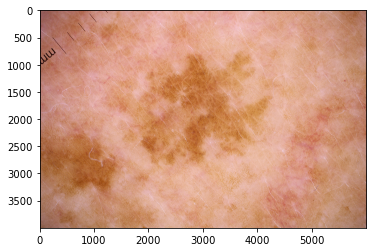

In [7]:
import matplotlib.pyplot as plt
img2 = img[:,:,::-1]
plt.imshow(img2)


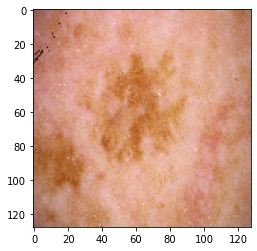

In [9]:
resized_img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_CUBIC)
plt.imshow(resized_img[:,:,::-1])